## 1. 판다스 조작

### 1.1 파일 읽기
- header : 컬럼으로 읽을 row의 index 입력
- usecols : 불러올 컬럼 범위 설정. list 혹은 'A:C'의 문자열 사용 가능
- skipfooter : 뒤에서 생략할 row의 수
- dtype : column의 dtype을 변경 할 때 사용
- names : column명 할당
- 인코딩 상의 오류 : 한글 오류가 대표적. encoding을 'euc-kr'로 변경하여 해결한다.

In [38]:
import pandas as pd
import numpy as np

sample_1 = pd.read_excel('./files/sample_1.xlsx', # 파일명
                         header=1, # 컬럼 row 설정
                         usecols=range(3), # 읽을 컬럼
                         skipfooter=2, # skiprow와 반대로 뒤에서 생략할 row의 수
                         dtype = {'입국객수':np.int64}
                         #names=['A','B','C'] # column명 할당
                        )

sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [27]:
sample_1.dtypes

국적코드     object
성별       object
입국객수    float64
dtype: object

In [29]:
fish = pd.read_csv('https://bit.ly/fish_csv', encoding='utf-8')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


### 1.2 DataFrame 개요
- DataFrame.info() : column 개수, Non-Null count, dtype, index range 등 정보 표출
- DataFrame.describe() : digit 컬럼의 평균, 분산, 분위수 등 기초통계량 표출
- Series.value_counts() : 정성데이터의 개수 표출

In [40]:
print(sample_1.columns)
print(sample_1.index)
print(sample_1.dtypes, end='\n\n')
sample_1.info()

Index(['국적코드', '성별', '입국객수'], dtype='object')
RangeIndex(start=0, stop=6, step=1)
국적코드    object
성별      object
입국객수     int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [41]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [42]:
sample_1['성별'].value_counts()

남성    3
여성    3
Name: 성별, dtype: int64

In [45]:
sample_1.iloc[:,:2]

,국적코드,성별
0,A01,남성
1,A01,여성
2,A31,남성
3,A31,여성
4,A18,남성
5,A18,여성


### 1.3 DataFrame 조작
- 컬럼 생성
- 조건 추출
    - and
    - or
    - Series.isin()
    - DataFrame.loc()
- 병합
    - pd.merge()
    - DataFrame.append()
    - pd.concat()

In [47]:
# 컬럼 생성
sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [51]:
# 조건 추출 : DataFrame에 bool type Series 입력
condition = sample_1['성별'] == '남성'
print(condition)
sample_1[condition]

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool


,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [52]:
# 조건 추출 : 2가지로 구분할 수 있을 때 '~' 사용 가능.
print(~condition)
sample_1[~condition]

0    False
1     True
2    False
3     True
4    False
5     True
Name: 성별, dtype: bool


,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
3,A31,여성,42,2019-11
5,A18,여성,232943,2019-11


In [55]:
# 연속형 자료에서도 가능.
condition = sample_1['입국객수'] >= 150000
print(~condition)
sample_1[~condition]

0     True
1    False
2     True
3     True
4    False
5    False
Name: 입국객수, dtype: bool


,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [59]:
# and, or 조건
condition_1 = sample_1['성별'] == '남성'
condition_2 = sample_1['입국객수'] >= 150000
print(condition_1 & condition_2)
print(sample_1[condition_1 & condition_2])
print()

print(condition_1 | condition_2)
print(sample_1[condition_1 | condition_2])

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool
  국적코드  성별    입국객수     기준년월
4  A18  남성  158912  2019-11

0     True
1     True
2     True
3    False
4     True
5     True
dtype: bool
  국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
2  A31  남성     319  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11


In [62]:
# .isin()
conditions = sample_1['국적코드'].isin(['A01', 'A31'])
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [65]:
# .loc()
sample_1.loc[1:3, ['성별','기준년월']]

,성별,기준년월
1,여성,2019-11
2,남성,2019-11
3,여성,2019-11


In [81]:
# merge
code_master = pd.read_excel('./files/sample_codemaster.xlsx')
sample_1_code = pd.merge(left=sample_1,
                         right= code_master,
                         how='left', # join 방법. right, left, outer(합집합), inner(교집합) 등
                         on = '국적코드' # 컬럼명이 같을 때 join할 컬럼 
                         #left_on = '국적코드' # 컬럼명이 다를 때 join할 컬럼 
                         #right_on = '국적코드' # 컬럼명이 다를 때 join할 컬럼 
                        )
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [86]:
# append
sample_2 = pd.read_excel('./files/sample_2.xlsx', header=1, usecols=[0,1,2], skipfooter=2)
sample_2['기준년월'] = '2019-12'
sample_2_code = pd.merge(left=sample_2, right=code_master, on='국적코드', how='left')
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [89]:
sample = sample_1_code.append(sample_2_code, ignore_index=True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [94]:
# concat
sample_concat = pd.concat([sample_1_code, sample_2_code], ignore_index=True, axis=0)
sample_concat

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


### 1.4 DataFrame 저장
- to_csv()
- to_excel()

In [97]:
sample.to_excel('./files/sample_class.xlsx', index=False, na_rep='NaN', sheet_name='my_sheet')

In [98]:
# save multiple sheet
with pd.ExcelWriter('./files/multiple_sheet.xlsx') as writer:
    sample.to_excel(writer, sheet_name='my_sheet1')
    sample_1_code.to_excel(writer, sheet_name='my_sheet2', na_rep='NaN')

### 1.5 통계량 출력
- DataFrame.pivot table()
- DataFrame.groupby()

In [112]:
# pivot table()
# 년월별로 국적별 입국객수
sample_pivot = sample.pivot_table(values = '입국객수',
                                 index = '국적명',
                                 columns = '기준년월',
                                 aggfunc = 'mean')
print(type(sample_pivot))
sample_pivot

<class 'pandas.core.frame.DataFrame'>


기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

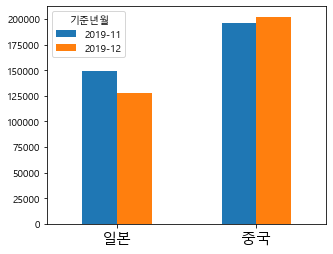

In [117]:
import matplotlib.pyplot as plt

sample_pivot.plot(kind='bar', figsize=(5,4), rot=0)
plt.rc('font', family='Malgun Gothic')
plt.xlabel('')
plt.xticks(size=15)
plt.yticks(size=10)